# Лабораторна робота №1 "Linear Regression"
---
Виконав: студент III курсу групи ДА-12 **Чернишов Михайло Олександрович**

### Мета
Навчитись реалізовувати лінійну регресію та градієнтний спуск.
### Завдання
1. Викачати необхідні дані.
2. Реалізувати лінійну регресію, яка за допомогою даних з колонки “x” прогнозує значення в колонці “y” (перша колонка у файлах - просто індекс, не ознака, не потрібно її використовувати). Тренування алгоритму повинно відбуватись лише на даних з train датасету. Test датасет слугує для перевірки якості вже натренованої моделі.
    - a. Візуалізувати дані з lab_1_train.csv.
    - b. Після кожної епохи виводити поточні значення ваг та функції втрат. Використовувати Mean Squared Error як функцію втрат.
    - c. Після того, як градієнтний спуск зійшовся, порахувати функцію втрат на тестових даних з lab_1_test.csv.
    - d. Візуалізувати на одному графіку дані з lab_1_train.csv,  lab_1_test.csv та лінію, до якої зійшовся розв’язок.

## Хід роботи
Імпорт необхідних модулів
___

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

Визначимо функцію для зчитування csv файлу
___

In [2]:
def read_csv(filename):
    data = []
    with open(filename, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            del row[reader.fieldnames[0]]
            data.append(row)
    return data

Визначимо функції для візуалізації даних
___

In [3]:
def visualize_data(data, color, title):
    x = [float(row["x"]) for row in data]
    y = [float(row["y"]) for row in data]
    plt.title(title)
    plt.scatter(x, y, c=color)
    plt.show()

def visualize_results(train_data, train_color, test_data, test_color, b0, b1, title):
    x = [float(row["x"]) for row in train_data]
    y = [float(row["y"]) for row in train_data]
    plt.title(title)
    plt.scatter(x, y, c=train_color)

    min_x = min(x)
    max_x = max(x)

    x = [float(row["x"]) for row in test_data]
    y = [float(row["y"]) for row in test_data]
    plt.scatter(x, y, c=test_color)

    min_x = min(min_x, min(x))
    max_x = max(max_x, max(x))

    plt.plot([min_x, max_x], [b0 + b1 * min_x, b0 + b1 * max_x])

    plt.show()

Визначимо функцію для обрахунку значення Loss function методом Mean Squared Error
___

In [4]:
def calculate_loss(data, b0, b1):
    loss = 0
    for row in data:
        real_value = float(row["y"])
        predicted_value = b0 + b1 * float(row["x"])
        loss += (real_value - predicted_value) ** 2
    return loss / float(len(data))

Визначимо функцію для реалізації Gradient descent
___

In [5]:
def gradient_descent(data, b0, b1, learning_rate):
    b0_gradient = 0
    b1_gradient = 0
    n = float(len(data))
    for row in data:
        real_value = float(row["y"])
        predicted_value = b0 + b1 * float(row["x"])
        b0_gradient += (predicted_value - real_value)
        b1_gradient += float(row["x"]) * (predicted_value - real_value)
    b0 = b0 - (learning_rate * b0_gradient * 2 / n)
    b1 = b1 - (learning_rate * b1_gradient * 2 / n)
    return b0, b1

Маючи всі небхідні функції, визначимо функцію для навчання на тренувальному наборі даних
___

In [6]:
def train(data, learning_rate, tolerance):
    b0 = float(abs(np.random.uniform()))
    b1 = float(abs(np.random.uniform()))
    loss = calculate_loss(data, b0, b1)
    epoch_num = 0
    delta = loss
    while delta >= tolerance:
        b0, b1 = gradient_descent(data, b0, b1, learning_rate)
        print(f"Epoch: {epoch_num}, Loss: {loss}, b0: {b0}, b1: {b1}")
        new_loss = calculate_loss(data, b0, b1)
        delta = abs(loss - new_loss)
        loss = new_loss
        epoch_num += 1
    return b0, b1

Тепер завантажимо тренувальні дані та візуалізуємо їх
___

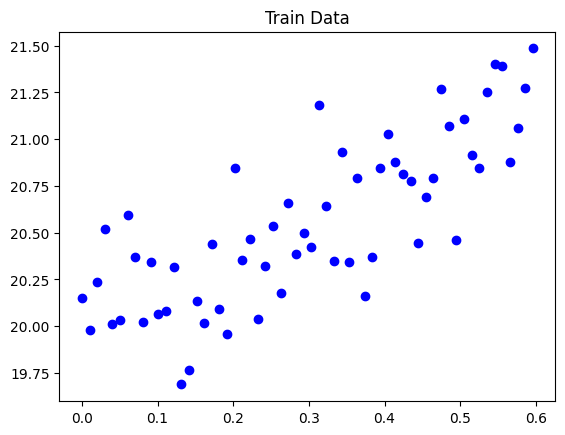

In [7]:
train_data = read_csv("lab_1_train.csv")
visualize_data(train_data, "b", "Train Data")

Проведемо тренування
___

In [8]:
b0, b1 = train(train_data, learning_rate=0.01, tolerance=0.000001)
print(f"b0: {b0}, b1: {b1}")

Epoch: 0, Loss: 377.2795820855045, b0: 1.326063377948977, b1: 0.7592440296776366
Epoch: 1, Loss: 361.01445062305186, b0: 1.7060085865591523, b1: 0.8732064003261951
Epoch: 2, Loss: 345.4515859661429, b0: 2.0776757213134607, b1: 0.9846323258178651
Epoch: 3, Loss: 330.5606658652233, b0: 2.4412454598773285, b1: 1.093577196782726
Epoch: 4, Loss: 316.3126773161999, b0: 2.7968945362570983, b1: 1.2000951948203689
Epoch: 5, Loss: 302.6798600302098, b0: 3.144795826878543, b1: 1.3042393188894967
Epoch: 6, Loss: 289.63565234423805, b0: 3.4851184347865414, b1: 1.4060614111215164
Epoch: 7, Loss: 277.15463946719194, b0: 3.818027772006916, b1: 1.5056121820706967
Epoch: 8, Loss: 265.2125039605886, b0: 4.14368564011056, b1: 1.6029412354131882
Epoch: 9, Loss: 253.7859783573763, b0: 4.46225030901908, b1: 1.6980970921069372
Epoch: 10, Loss: 242.85279982656616, b0: 4.7738765940903445, b1: 1.7911272140242582
Epoch: 11, Loss: 232.39166679534048, b0: 5.078715931521486, b1: 1.8820780270685782
Epoch: 12, Loss: 2

Завантажимо та візуалізуємо дані для тестування
___

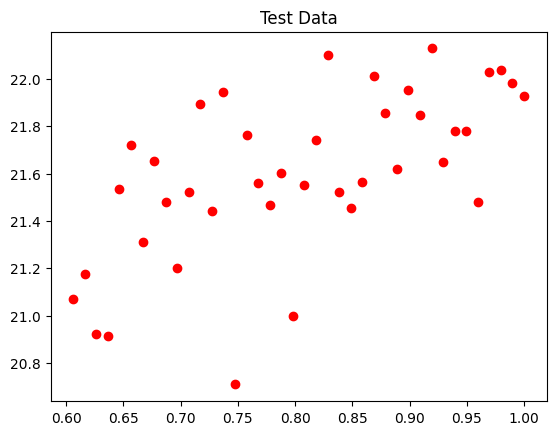

In [9]:
test_data = read_csv("lab_1_test.csv")
visualize_data(test_data, "r", "Test Data")

Обрахуємо значення функції втрат на даних для тестування
___

In [10]:
calculate_loss(test_data, b0, b1)

0.07538283457838559

Представимо на одному графіку дані для тренування, дані для тестування та лінію, до якої зійшовся розв'язок
___

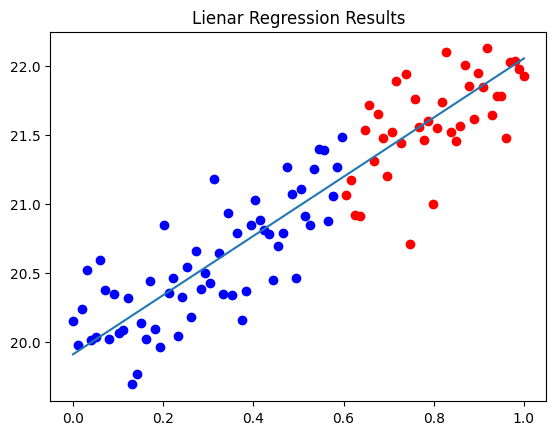

In [11]:
visualize_results(train_data, "b", test_data, "r", b0, b1, "Lienar Regression Results")